# Perform exploratory data analysis to guide model tuning

Visit this link for more information about the fire index features:
https://www.nwcg.gov/publications/pms437/cffdrs/fire-weather-index-system

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# prep plotting aesthetics
#set font size names
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 22
#set font sizes
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
#set figure size
plt.rcParams["figure.figsize"] = (14, 8) # size of the figure plotted

## Load and format data

In [2]:
#load in cleaned data
DATA = pd.read_csv("data/Algerian_forest_fires_dataset_CLEANED.csv")

#drop extra index
DATA.drop('Unnamed: 0', axis = 1, inplace = True)

#add datetime column based on day, month, year
DATA['Datetime'] = pd.to_datetime(DATA[['year', 'month', 'day']])

DATA.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Datetime
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,notfire,Bejaia,2012-06-01
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,notfire,Bejaia,2012-06-02
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,notfire,Bejaia,2012-06-03
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,notfire,Bejaia,2012-06-04
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,notfire,Bejaia,2012-06-05


## Plot scatterplots and examine correlations

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.91 µs


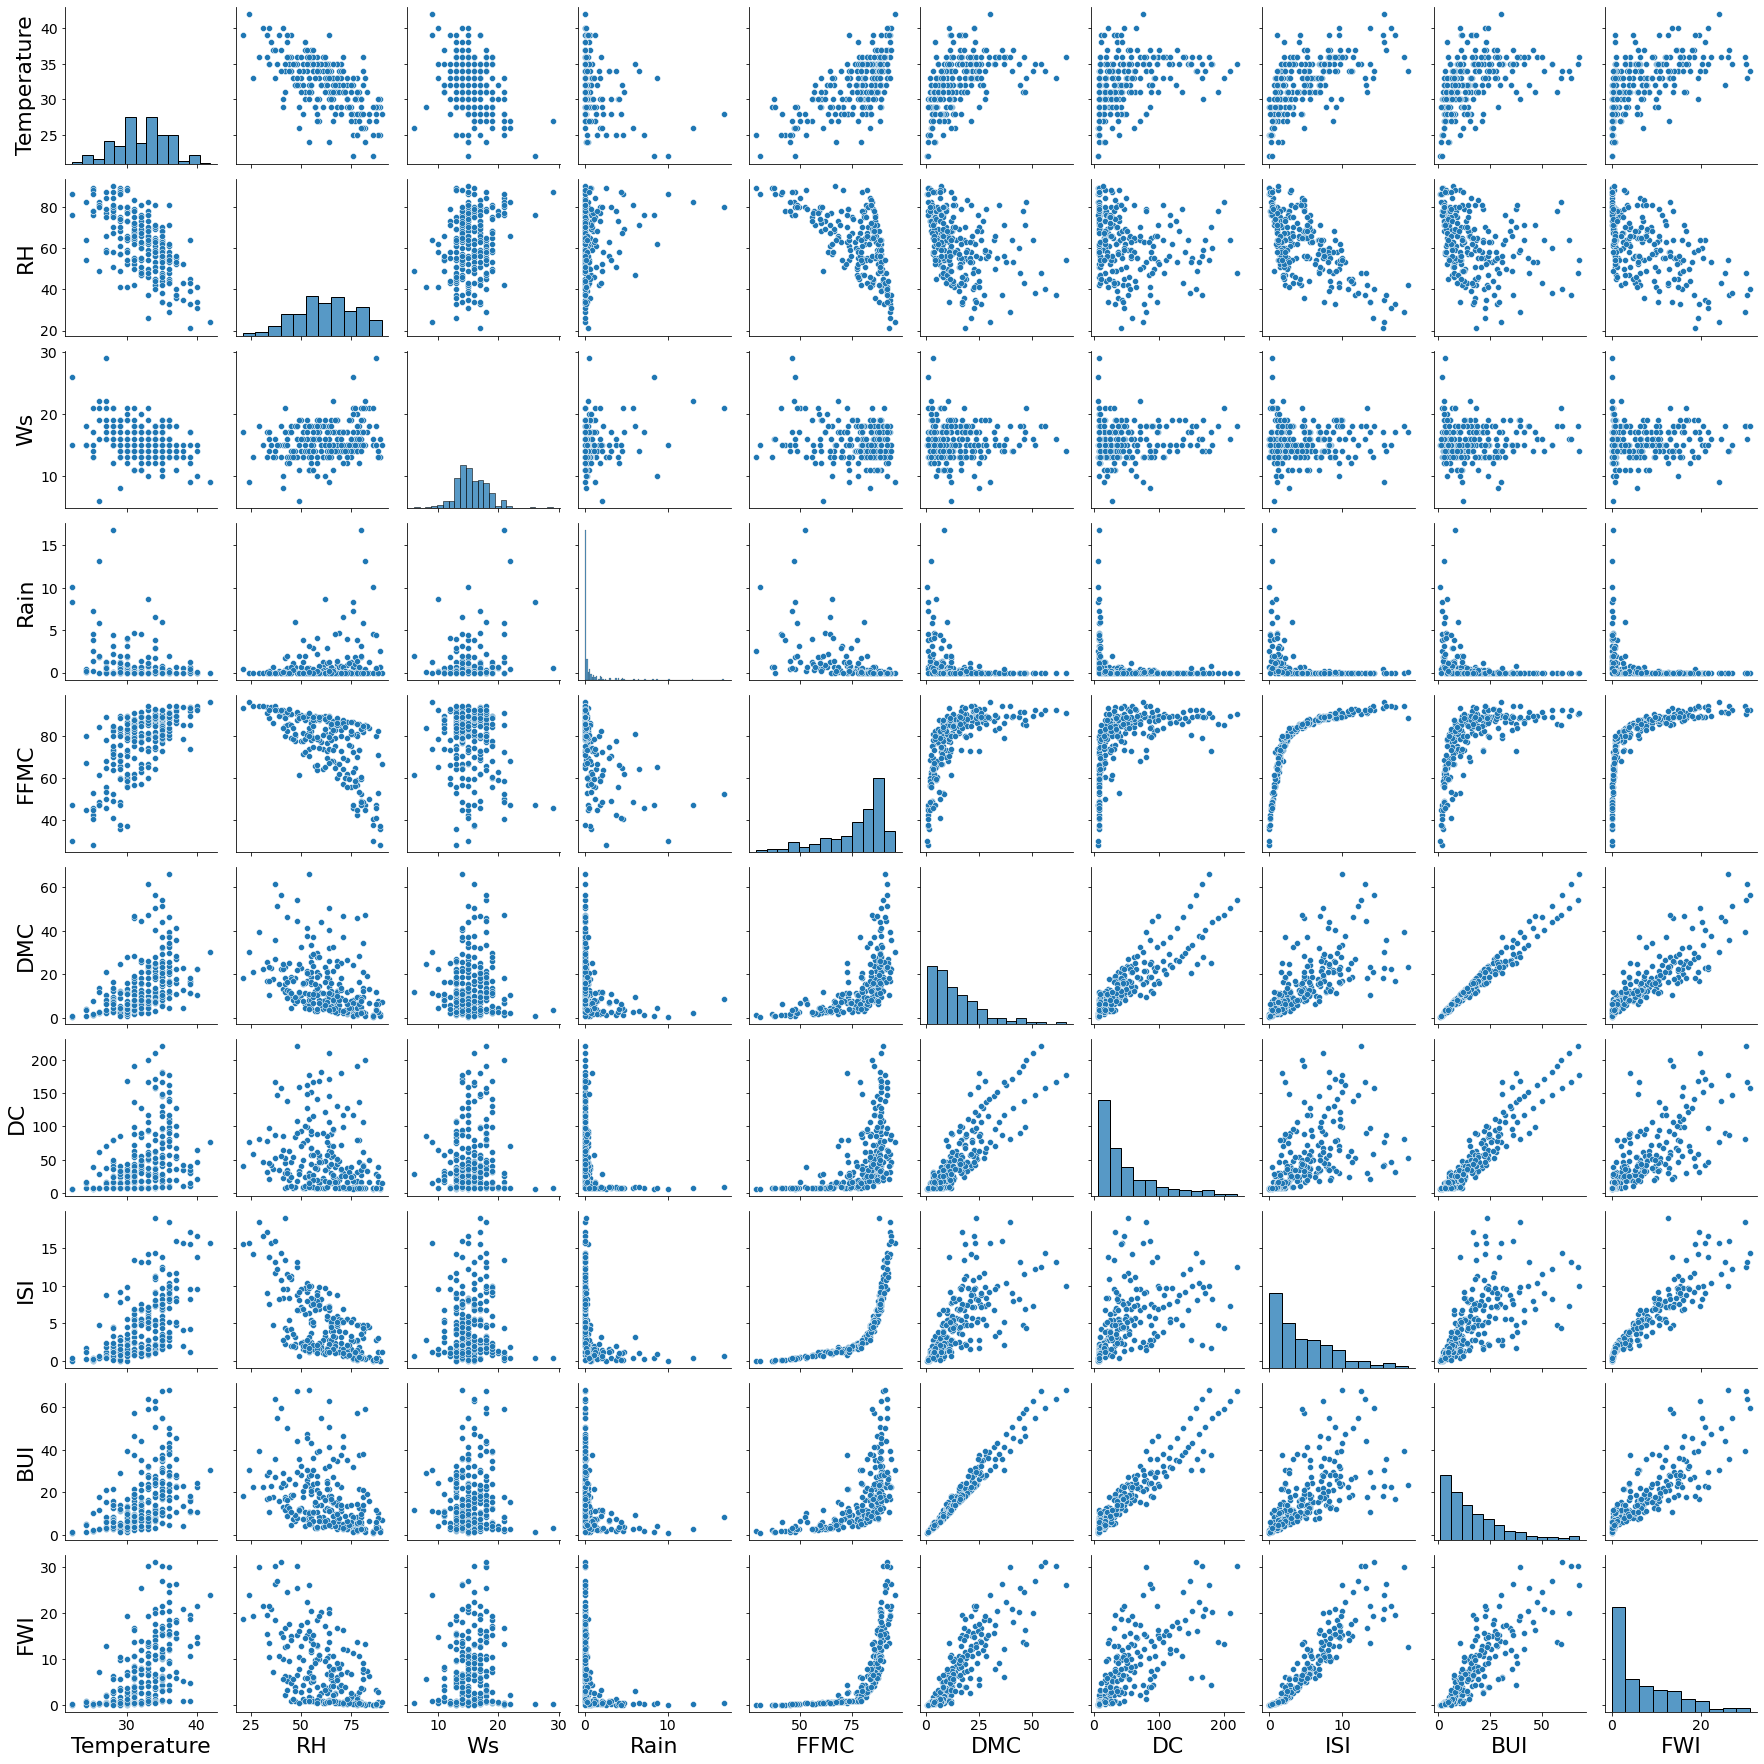

In [3]:
#scatter plot for all of the covariates except the date/time
%time
sns.pairplot(DATA[['Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI']])
plt.savefig('figures/figure_1.png')

From the pairplot we can examine outliers, but the only significant outliers we find are from the Rain variable, and we think theese should be included in the data as two days of heavy rain seems naturally occuring to us (rather than measurement error) and also useful information in understanding factors that lead to fire.

In [4]:
#examine numerical correlations between all variables
DATA[['Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI','month']].corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,month
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,-0.056781
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.041252
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.039880
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,0.034822
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.017030
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.067943
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.126511
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.065608
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.085073
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.082639


# Take a closer look at related features

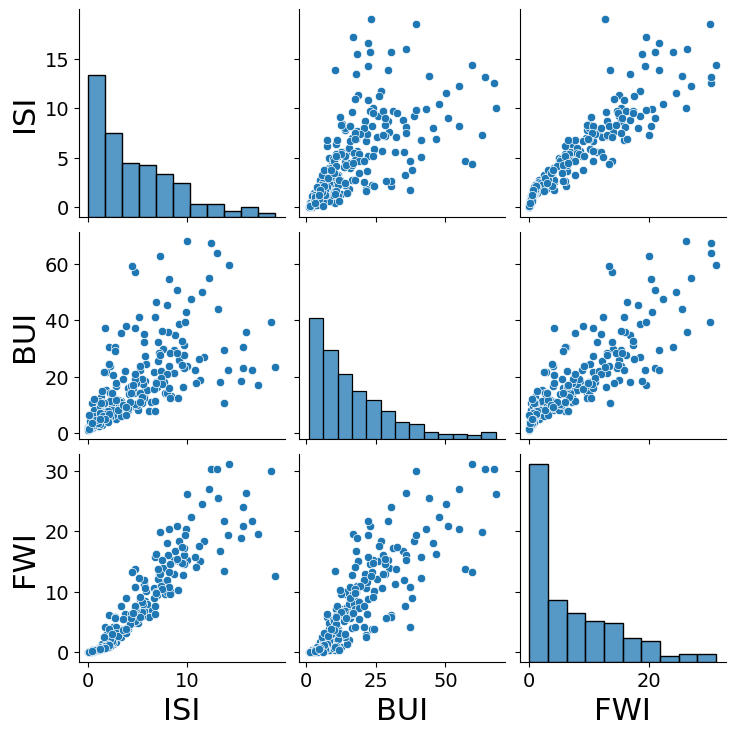

In [5]:
#these features are the fire behaviour indices which are related to each other so we expect correlations here
sns.pairplot(DATA[['ISI','BUI','FWI']])
plt.savefig('figures/figure_2.png')

As expected, there are strong linear relationships between FWI, BUI, and ISI. All three of these indices move together as they capture related information about how a fire will behave.

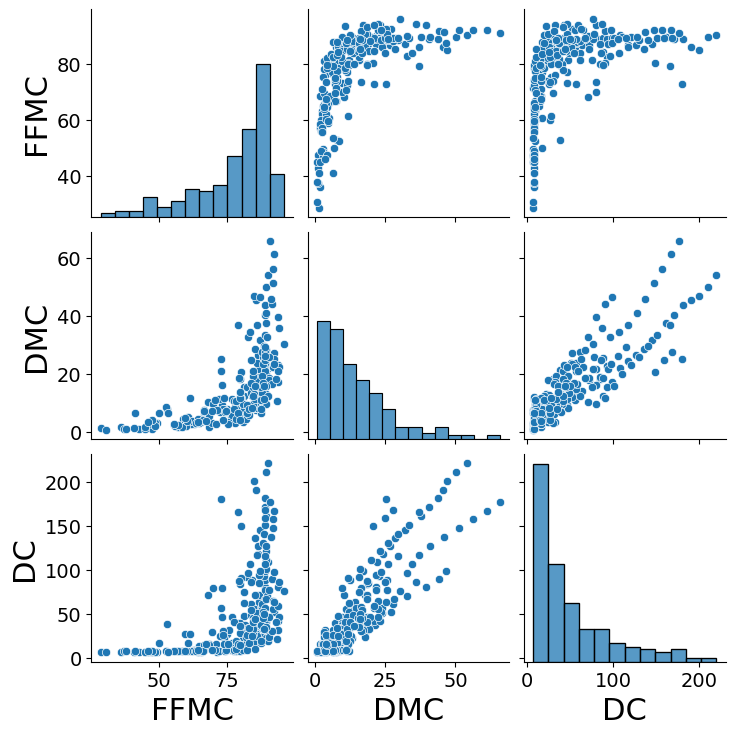

In [6]:
#these features are fuel moisture codes which are related to each other so we expect correlations here
sns.pairplot(DATA[['FFMC','DMC','DC',]])
plt.savefig('figures/figure_3.png')

We observe linear relationships between the DMC and DC. While the relationship between FFMC and the two others seems to resemble a logarithmic relationship, although the curve is quite sharp. This means that as FFMC increases DC stays consistent until around 80 FFMC where the spread of DC increases greatly. The FFMC is an inverse measure of moisture content in easily ignited surface litter and other cured fine fuels, hence it is to be expected that this increases as the drought code increases.

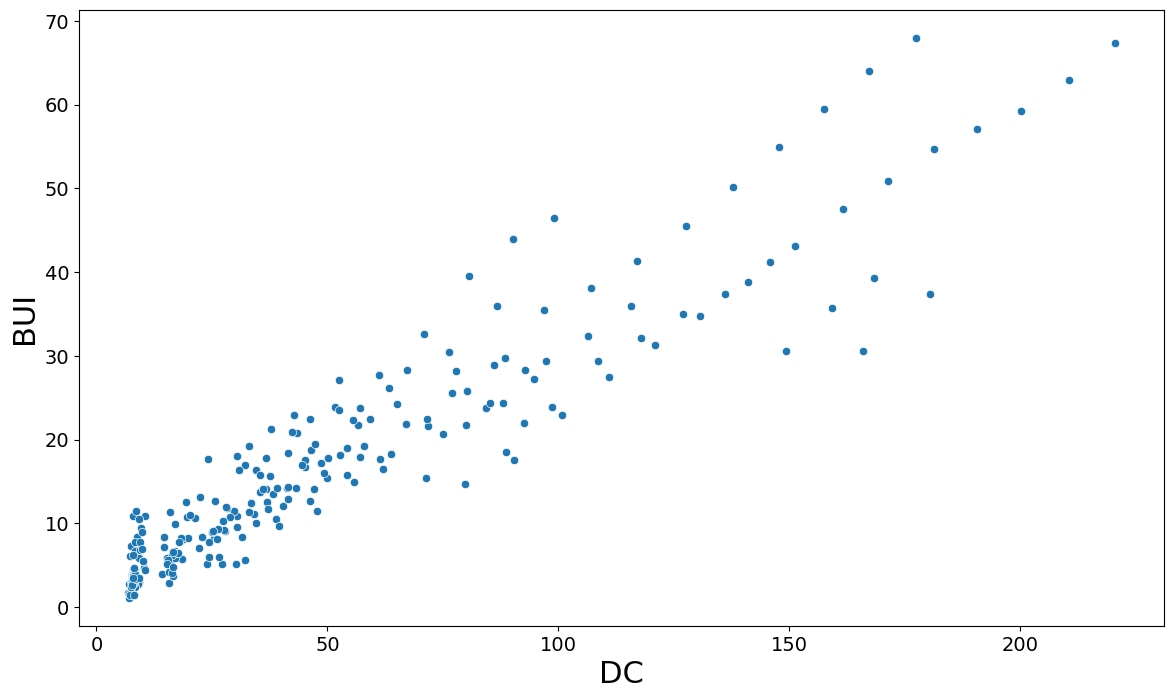

In [7]:
#plot one of the moisture codes and one of the fire behaviour indicies
sns.scatterplot(x='DC',y='BUI',data=DATA)
plt.savefig('figures/DC_by_BUI.png')

We see a reasonably linear relationship between the DC and BUI, however at the end we see the relationships follow two lines quite rigorously. The BUI is mathematically based on DMC and DC, so this should not be a surprise.

## Examine Fire Weather Index (FWI)

The FWI incorporates the ISI and BUI, meaning it is a compound covariate of a lot of the covariates that we expect could have prediction power over forest fires.

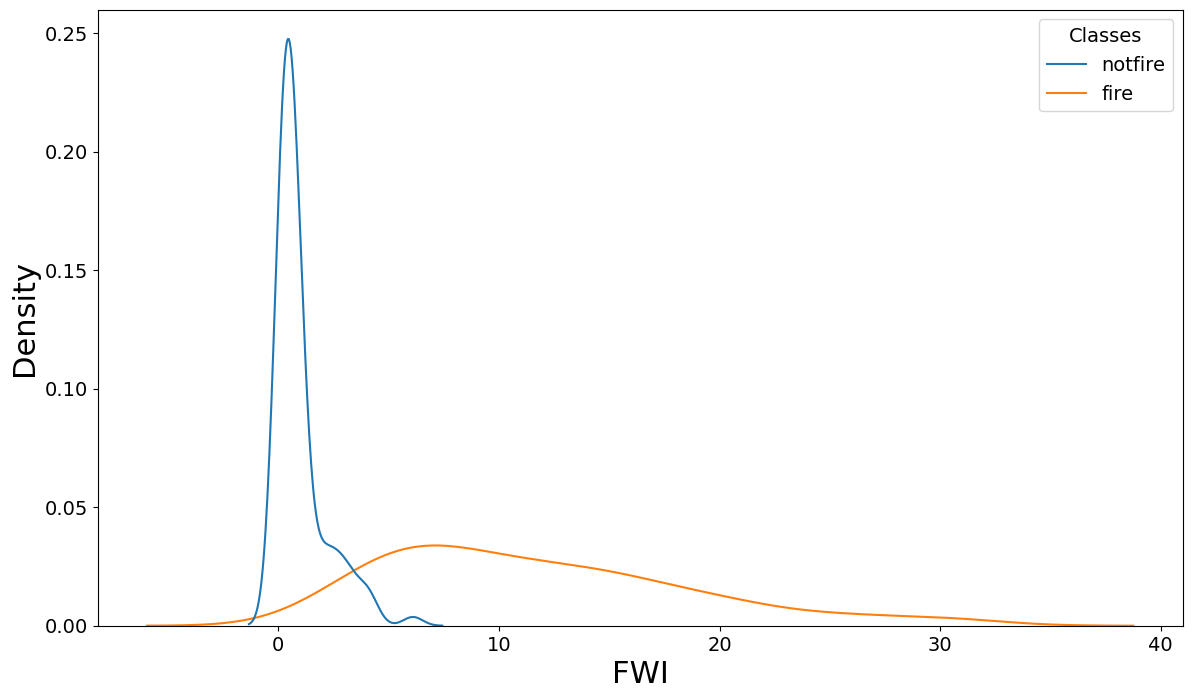

In [8]:
#plot kernel density estimate of FWI by fire status
sns.kdeplot('FWI',hue='Classes', data=DATA)
plt.savefig('figures/figure_4.png')

Unsurprisingly the compoung variable FWI has substantial correlation with the fire/notfire variable. If FWI is over 8, then the data indicates we can be reasonably sure there is fire

## Fires and temperature over time

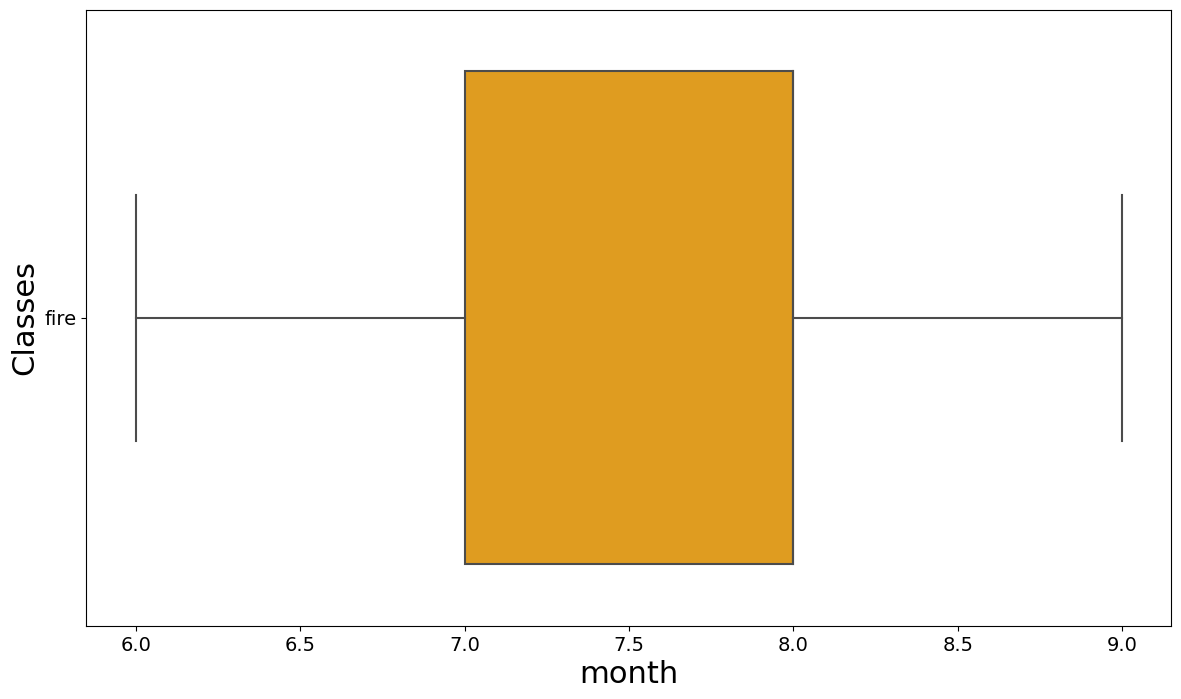

In [9]:
#plot boxplot of fires over month to see when fires are most common
sns.boxplot(x='month',y='Classes',data=DATA[DATA['Classes'] == 'fire'], color='orange')
plt.savefig('figures/Class_month_boxplot.png')

We observe that half of the fires are in the month of July, with a fairly even spread before and after.

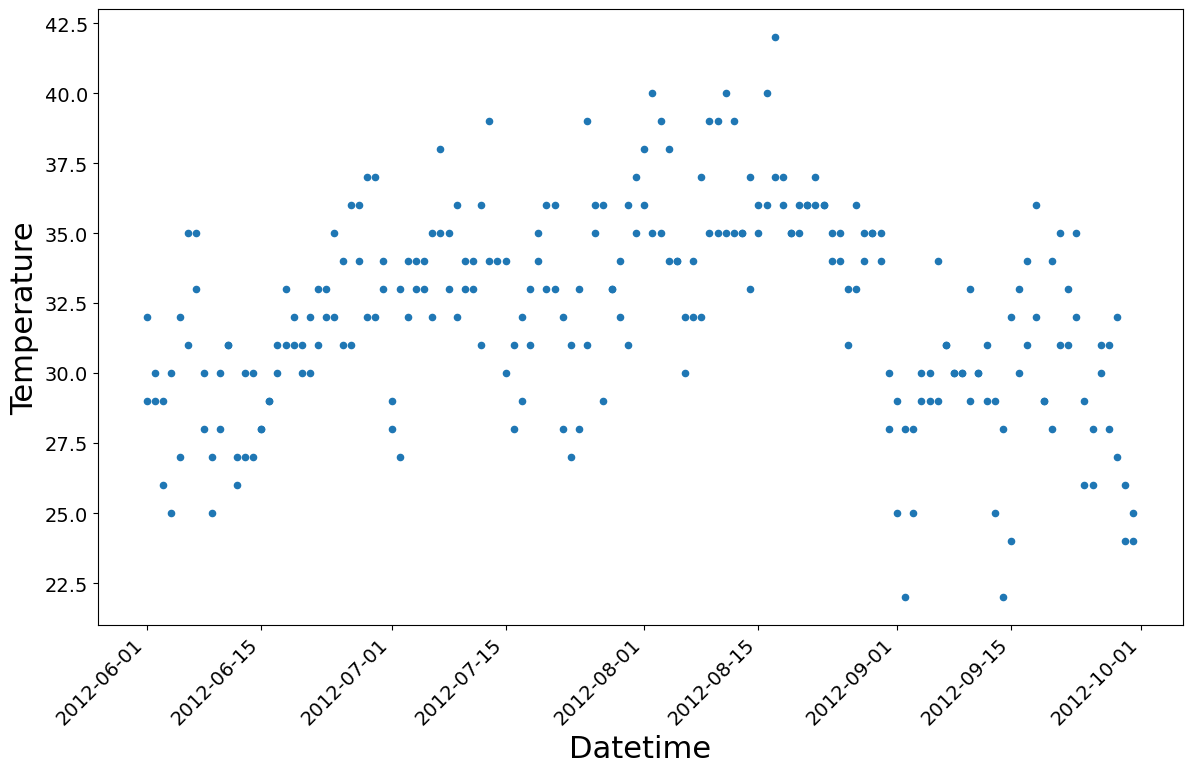

In [10]:
#plot scatterplot of temperature over time
DATA.plot.scatter(x='Datetime',y='Temperature')
plt.xticks(rotation=45,ha='right');
plt.savefig('figures/temp_by_date.png')

The plot above demonstrates that the highest tesmperatures take place in July and August. As seen by the boxplot above, this is also more or less when the most fires occur, so we can observe a clear relationship between temperature and fires. While this might be an intuitive conclusion, it is useful to confirm that the data supports our understanding.